In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

In [2]:
nba = pd.read_csv('./data/NBA_train.csv')
nba.describe()

,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,1996.319760,0.574850,41.000000,8370.239521,8370.239521,3200.367665,6873.318563,2881.324551,5956.444311,319.043114,916.874251,1650.461078,2189.953293,1061.584431,2427.354491,1912.112575,668.364072,419.805988,1302.837126
std,9.243808,0.494662,12.740822,581.040114,587.543959,287.181266,401.027166,446.097941,830.596327,199.698941,523.982964,197.651728,244.491086,150.224519,130.671523,221.610925,93.393044,82.274913,153.973470
min,1980.000000,0.000000,11.000000,6901.000000,6909.000000,2565.000000,5972.000000,1981.000000,4153.000000,10.000000,75.000000,1189.000000,1475.000000,639.000000,2044.000000,1423.000000,455.000000,204.000000,931.000000
25%,1989.000000,0.000000,31.000000,7934.000000,7934.000000,2974.000000,6563.500000,2510.000000,5269.000000,131.500000,413.000000,1502.500000,2008.000000,953.500000,2346.500000,1735.000000,599.000000,359.000000,1192.000000
50%,1996.000000,1.000000,42.000000,8312.000000,8365.000000,3150.000000,6831.000000,2718.000000,5706.000000,329.000000,942.000000,1628.000000,2176.000000,1055.000000,2433.000000,1899.000000,658.000000,410.000000,1289.000000
75%,2005.000000,1.000000,50.500000,8784.500000,8768.500000,3434.500000,7157.000000,3296.000000,6753.500000,481.500000,1347.500000,1781.000000,2352.000000,1167.000000,2516.500000,2077.500000,729.000000,469.500000,1395.500000
max,2011.000000,1.000000,72.000000,10371.000000,10723.000000,3980.000000,8868.000000,3954.000000,7873.000000,841.000000,2284.000000,2388.000000,3051.000000,1520.000000,2753.000000,2575.000000,1053.000000,716.000000,1873.000000


In [6]:
# how many games does a team need to win in order to make the playoffs?

nba.groupby(['W', 'Playoffs']).size().sort_values(ascending=False)


W   Playoffs
50  1           32
42  1           29
47  1           28
44  1           27
41  1           26
55  1           24
57  1           23
45  1           22
52  1           20
30  0           19
28  0           18
43  1           18
24  0           18
54  1           18
36  0           17
49  1           17
33  0           17
53  1           17
26  0           17
56  1           16
34  0           16
46  1           15
31  0           15
37  0           15
59  1           14
48  1           14
58  1           13
35  0           13
62  1           13
40  1           13
                ..
19  0           10
61  1           10
40  0            9
60  1            8
42  0            8
38  0            8
63  1            7
38  1            7
18  0            5
36  1            4
37  1            4
67  1            4
35  1            3
45  0            3
64  1            3
65  1            3
14  0            2
12  0            2
16  0            2
13  0            2
11  0            2

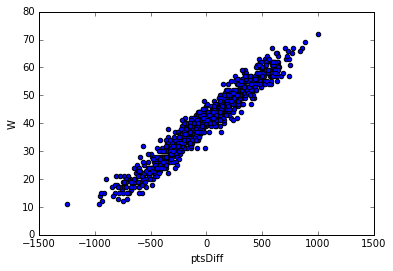

In [12]:
# So in basketball, games are won by scoring more points than the other team.
# Can we use the difference between points scored and points allowed throughout the regular season in order
# to predict the number of games that a team will win?

nba['ptsDiff'] = nba.PTS - nba.oppPTS
nba.plot('ptsDiff', 'W', kind='scatter')

It looks like there's an incredibly strong linear relationship

In [14]:
wins_reg = sm.ols(formula='W ~ ptsDiff', data=nba)
fitting_wins = wins_reg.fit()
fitting_wins.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.361e+04
Date:                Wed, 29 Jun 2016   Prob (F-statistic):               0.00
Time:                        20:13:25   Log-Likelihood:                -2118.0
No. Observations:                 835   AIC:                             4240.
Df Residuals:                     833   BIC:                             4249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     41.0000      0.106    387.027      0.000        40.792    41.208
ptsDiff        0.0326      0.000    116.681      0.000         0.032     0.033
==============================================================================
Omnibus:                        0.985   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.946
Skew:                           0.082   Prob(JB):                        0.623
Kurtosis:                       3.006   Cond. No.                         379.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The equation is:

W = 41 + 0.0326 * ptsDiff

## Points Scored

Let's predict points scored

In [19]:
#points_reg = sm.ols(formula='PTS ~ 2PA + 3PA + FTA + AST + ORB + DRB + TOV + STL + BLK', data=nba)
nba['2PA']

0      6952
1      6965
2      6668
3      7854
4      7215
5      7377
6      7197
7      7117
8      7375
9      7375
10     7268
11     7398
12     7206
13     7481
14     7031
15     6955
16     7035
17     7532
18     6951
19     7376
20     6632
21     7558
22     6784
23     6858
24     6724
25     7360
26     6763
27     7815
28     6902
29     7074
       ... 
805    5002
806    5100
807    5162
808    5172
809    5158
810    4695
811    4909
812    5391
813    5298
814    5132
815    5134
816    5075
817    5270
818    5875
819    4822
820    5130
821    5449
822    5301
823    5184
824    4786
825    5206
826    4308
827    5528
828    4987
829    5096
830    5702
831    4901
832    5664
833    5334
834    5706
Name: 2PA, dtype: int64